In [1]:
import os
import torch
import numpy as np

#from CODE.AttentionDCA_python.src.plot_functions import contact_plot
from CODE.AttentionDCA_python.src.dcascore import score

from CODE.AttentionDCA_python.src.model_sep_size_heads import MultiDomainAttentionSubBlock

cwd = os.getcwd()
print(cwd)

filename = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_concatenated_nodupli.fasta'
structfile = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA


In [2]:
def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)
    return tensor

In [3]:
loss_type = 'without_J'

family =  'HKRR_withinter_alone_nomasks_but_with_new_NEW_model_sep_optimizer_newreg_withHKRRfasta_d12_5000batch'
H = 46
d= 12
H1 = 15
H2 = 15+H1
N=176
q = 22
domain1_end = 63

device = 'cpu'
n_epochs = 500
K1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

K2 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q2 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V2 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

Kint1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Kint1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Qint1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Qint1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Vint1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Vint1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

Kint2 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Kint2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Qint2 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Qint2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Vint2 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Vint2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))


model = MultiDomainAttentionSubBlock(
        H=H, d=d, N=N, q=q,
        domain1_end=domain1_end,
        
        H1 = H1,H2=H2
    ).to(device)

model.Q1.data = Q1
model.K1.data = K1
model.V1.data = V1

model.Q2.data = Q2
model.K2.data = K2
model.V2.data = V2

model.Qint1.data = Qint1
model.Kint1.data = Kint1
model.Vint1.data = Vint1

model.Qint2.data = Qint2
model.Kint2.data = Kint2
model.Vint2.data = Vint2

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Q1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.K1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:87: UserWarning: To copy construct from a tensor, it is recomme

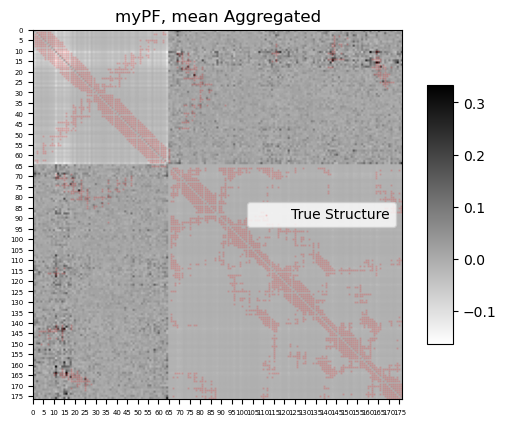

In [7]:
from CODE.AttentionDCA_python.src.plot_functions_sep_size2 import assemble_full_attention_map_subblock, k_matrix_precomputed, graphAtt_precomputed
# Example usage:
A_dom1 = assemble_full_attention_map_subblock(model, subblock='inter', make_inter_sym=False)
# This yields shape (H, N, N) but only domain1 heads are filled in the top-left block;
# everything else is zero.

M_dom1, _A = k_matrix_precomputed(A_dom1, k=2000, version='mean', sym=True, APC=True, sqr=False)
graphAtt_precomputed(M_dom1, _A, filestruct=structfile, PFname='myPF', ticks= np.arange(0, N, 5))
